In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_diabetes

In [10]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [11]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data['age'] = diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
y = data['age']
X = data.drop('age', axis=1)

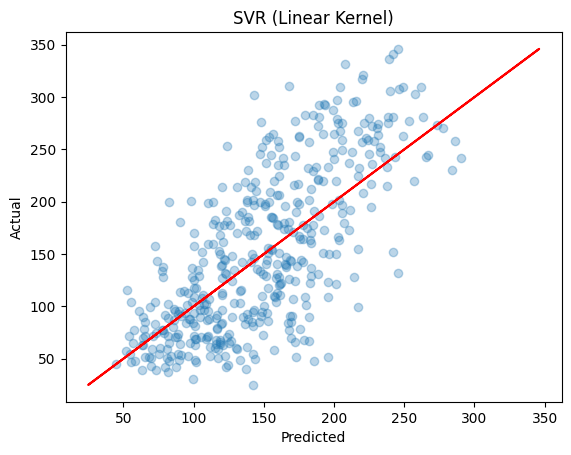

SVR (Linear Kernel): R2=0.509, MSE=2913.113, MAE=43.437, MAPE=37.87%, Adj_R2=0.499


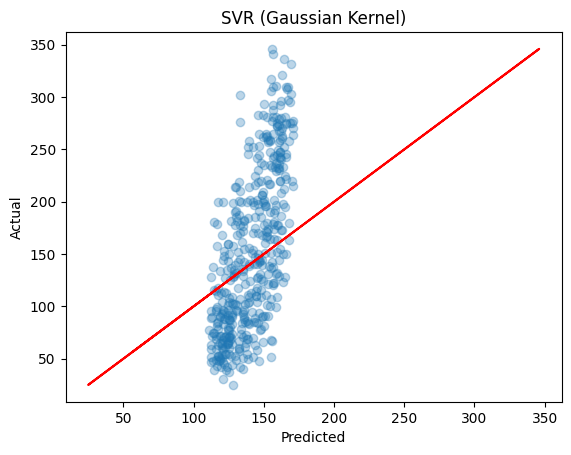

SVR (Gaussian Kernel): R2=0.221, MSE=4618.012, MAE=56.548, MAPE=48.59%, Adj_R2=0.205


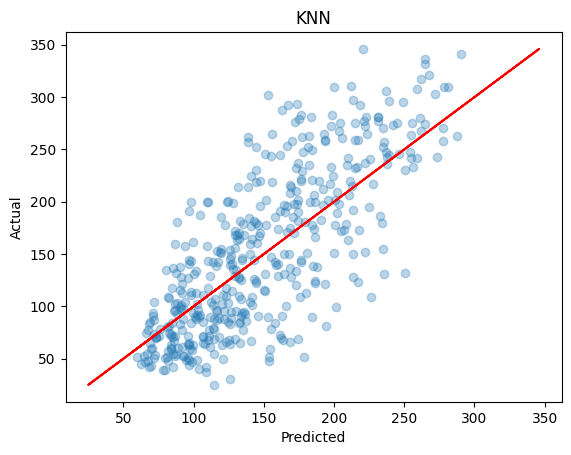

KNN: R2=0.586, MSE=2453.548, MAE=39.658, MAPE=34.59%, Adj_R2=0.578


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


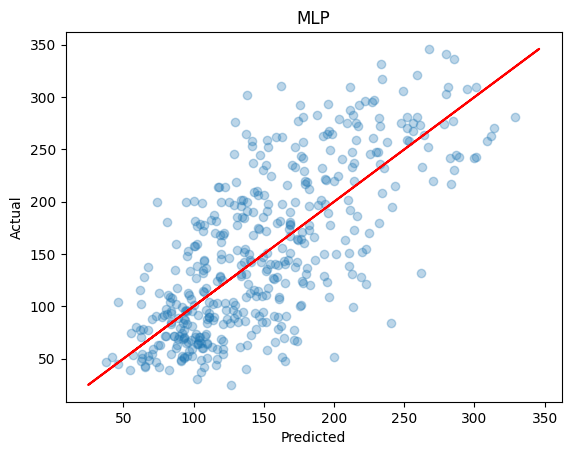

MLP: R2=0.523, MSE=2829.045, MAE=42.847, MAPE=36.74%, Adj_R2=0.513


In [14]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot(model, X, y, name=None):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    plt.scatter(y_pred, y, alpha=0.3)
    plt.plot(y, y, c='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    title = name if name else type(model).__name__
    plt.title(title)
    plt.show()

    print(f"{title}: R2={r2:.3f}, MSE={mse:.3f}, MAE={mae:.3f}, MAPE={mape:.2f}%, Adj_R2={adj_r2:.3f}")
    return {'MSE': mse, 'MAE': mae, 'MAPE': mape, 'R2': r2, 'Adj_R2': adj_r2}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = {}
results['SVR (linear)'] = evaluate_and_plot(SVR(kernel='linear', max_iter=4000), X_scaled, y, 'SVR (Linear Kernel)')
results['SVR (rbf)'] = evaluate_and_plot(SVR(kernel='rbf', max_iter=4000), X_scaled, y, 'SVR (Gaussian Kernel)')
results['KNN'] = evaluate_and_plot(KNeighborsRegressor(), X_scaled, y, 'KNN')
results['MLP'] = evaluate_and_plot(MLPRegressor(max_iter=700, random_state=42), X_scaled, y, 'MLP')


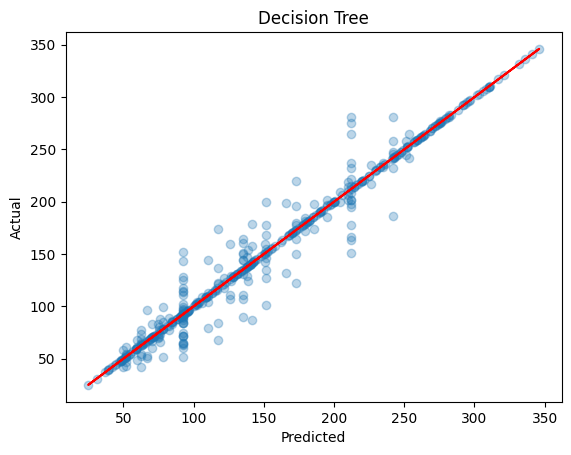

Decision Tree: R2=0.966, MSE=202.119, MAE=6.495, MAPE=5.72%, Adj_R2=0.965


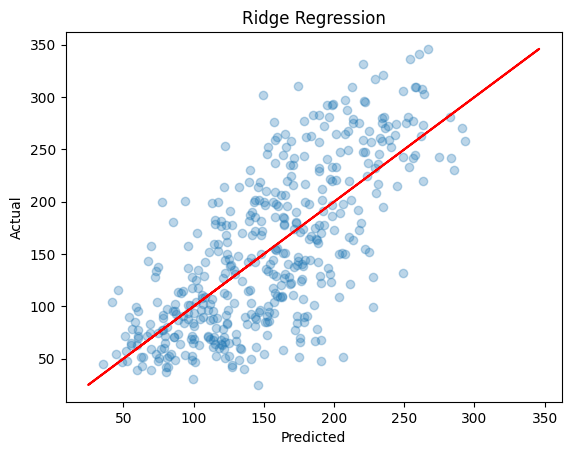

Ridge Regression: R2=0.518, MSE=2860.862, MAE=43.282, MAPE=38.76%, Adj_R2=0.508


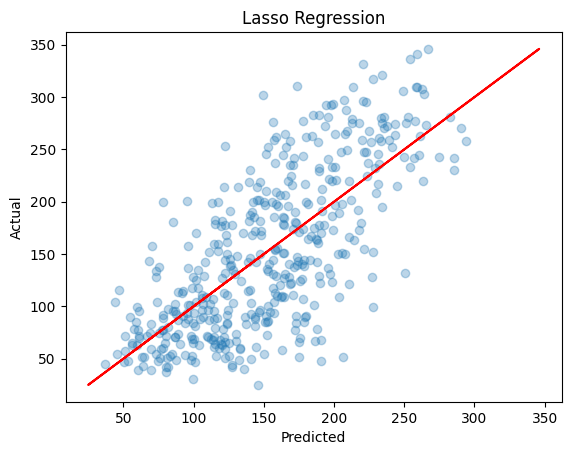

Lasso Regression: R2=0.517, MSE=2862.035, MAE=43.303, MAPE=38.76%, Adj_R2=0.507


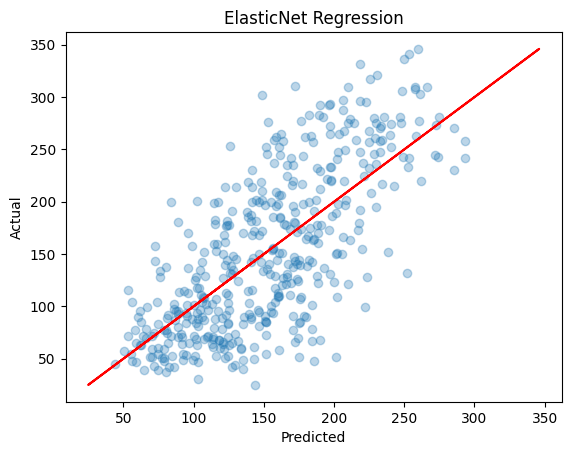

ElasticNet Regression: R2=0.514, MSE=2879.817, MAE=43.507, MAPE=38.92%, Adj_R2=0.504


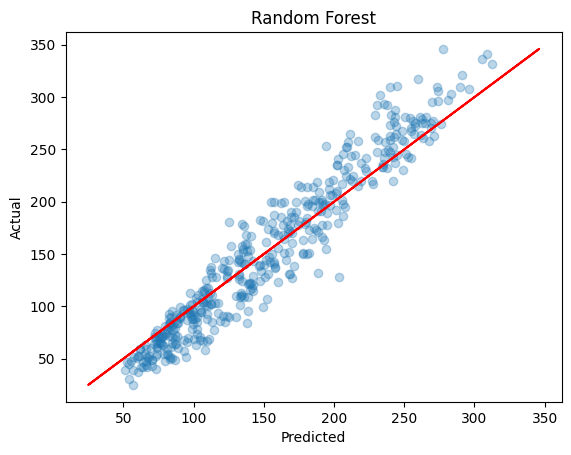

Random Forest: R2=0.910, MSE=530.960, MAE=18.169, MAPE=15.74%, Adj_R2=0.909


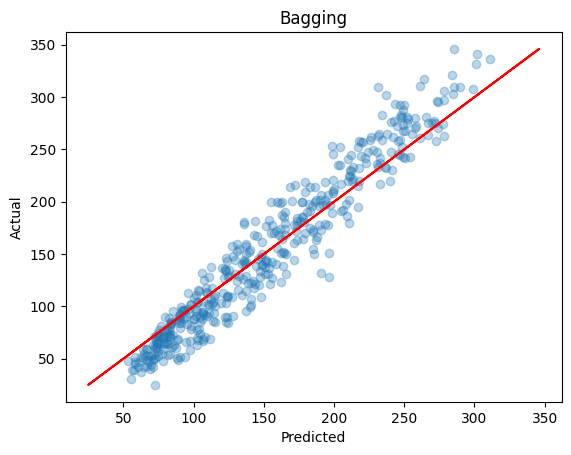

Bagging: R2=0.917, MSE=494.609, MAE=17.919, MAPE=15.67%, Adj_R2=0.915


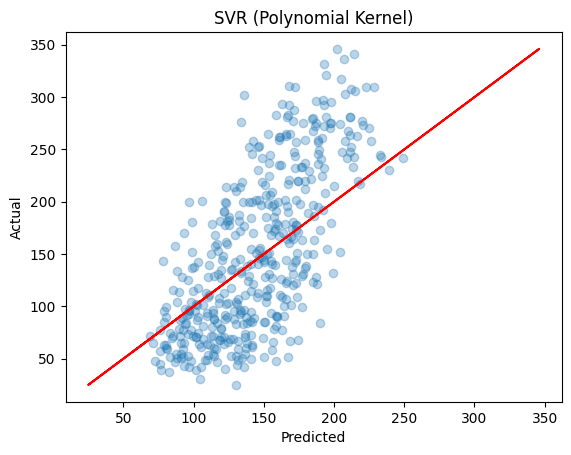

SVR (Polynomial Kernel): R2=0.432, MSE=3366.386, MAE=47.628, MAPE=41.15%, Adj_R2=0.420


In [15]:
results['Decision Tree'] = evaluate_and_plot(DecisionTreeRegressor(max_depth=10), X_scaled, y, 'Decision Tree')
results['Ridge'] = evaluate_and_plot(Ridge(alpha=1.0), X_scaled, y, 'Ridge Regression')
results['Lasso'] = evaluate_and_plot(Lasso(alpha=0.1), X_scaled, y, 'Lasso Regression')
results['ElasticNet'] = evaluate_and_plot(ElasticNet(alpha=0.1, l1_ratio=0.5), X_scaled, y, 'ElasticNet Regression')
results['Random Forest'] = evaluate_and_plot(RandomForestRegressor(n_estimators=30, random_state=42), X_scaled, y, 'Random Forest')
results['Bagging'] = evaluate_and_plot(BaggingRegressor(n_estimators=50, random_state=42), X_scaled, y, 'Bagging')
results['SVR (poly)'] = evaluate_and_plot(SVR(kernel='poly', degree=1, coef0=3, max_iter=100000), X_scaled, y, 'SVR (Polynomial Kernel)')